In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as py
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.5,NaN


In [3]:
wego['ADJUSTED_EARLY_COUNT'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
350324    False
350325    False
350326    False
350327    False
350328    False
Name: ADJUSTED_EARLY_COUNT, Length: 350329, dtype: bool

1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

ontime_performance = early_count+late_count+ontime_count / ontime_count

In [4]:
early_count = sum(wego['ADJUSTED_EARLY_COUNT'])
early_count

9775

In [5]:
late_count = sum(wego['ADJUSTED_LATE_COUNT'])
late_count

59038

In [6]:
ontime_count = sum(wego['ADJUSTED_ONTIME_COUNT'])
ontime_count

270048

In [7]:
full_count = early_count+late_count+ontime_count
full_count

338861

In [8]:
ontime_perf = ontime_count / full_count *100
ontime_perf

79.69285341187094

on-time performance is 79.69%

In [9]:
# 96.73% of data represented

In [67]:
(
wego
    .loc[wego['ADJUSTED_EARLY_COUNT'] == 0]
    .loc[wego['ADJUSTED_LATE_COUNT'] == 0]
    .loc[wego['ADJUSTED_ONTIME_COUNT'] == 0]
    # .loc[wego['ACTUAL_HDWY'].isnull()]
    # .loc[wego['HDWY_DEV'].isnull()]
    # .loc[wego['DWELL_IN_MINS'].isnull()]
    # .loc[wego['ACTUAL_ARRIVAL_TIME'].isnull()] # 11459
    .loc[wego['ACTUAL_DEPARTURE_TIME'].isnull()] # 11468
    .loc[wego['ADHERENCE'].isnull()] #11468
    # .loc[wego['OVERLOAD_ID'].isnull()]
    # .loc[wego['IS_RELIEF'].isnull()]
    # .loc[wego['SCHEDULED_HDWY'].isnull()]
    # .loc[wego['SCHEDULED_TIME'].isnull()]
)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
39,120230801,1,99457929,2023-08-01,22,2200,1040,345115,0,FROM DOWNTOWN,CLFF,9.0,2,36.192856,-86.828554,2023-08-01 10:25:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
40,120230801,1,99457930,2023-08-01,22,2200,1040,345116,0,TO DOWNTOWN,CLFF,9.0,1,36.192856,-86.828554,2023-08-01 10:35:00,NaN,NaN,NaN,50.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
53,120230801,1,99457943,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-08-01 12:56:00,NaN,NaN,NaN,50.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
67,120230801,1,99457957,2023-08-01,22,2200,2374,345124,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,2023-08-01 15:27:00,NaN,NaN,NaN,50.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
135,120230801,1,99458027,2023-08-01,22,2201,1617,345215,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 06:40:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350249,120230930,2,100406533,2023-09-30,7,701,2531,353393,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 23:29:00,NaN,NaN,NaN,30.0,NaN,NaN,0,0,0,0,0.0,0,NaN,NaN
350295,120230930,2,100406581,2023-09-30,7,702,2312,353438,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 16:03:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350313,120230930,2,100406599,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 20:33:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN
350319,120230930,2,100406605,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 21:38:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,0,NaN,NaN


In [11]:
(
wego
    .loc[wego['ADHERENCE'].isnull()]
    # .loc[wego['OVERLOAD_ID'].isnull()]
    # .loc[wego['IS_RELIEF'].isnull()]
    # .loc[wego['SCHEDULED_HDWY'].isnull()]
).shape

(11468, 30)

In [12]:
wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.5,NaN


In [13]:
# add percentages for early and late data as well

In [14]:
early_perf = early_count / full_count *100
early_perf

2.8846636231375107

In [15]:
late_perf = late_count / full_count *100
late_perf

17.422482964991545

In [16]:
# so of the ~ 20% where the bus is not on time, it's overwhelmingly because they're late in those instances

In [17]:
# make a little pie chart of this in tableau?

what do the overall distributions of adherence look like?

'distribution' = histogram

Adherence refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [18]:
wego_adher = (
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
)
wego_adher.head(1)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1


In [19]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [20]:
x = wego['ADHERENCE']
y = wego['TRIP_ID']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='r', label='Data Points')  # Scatter plot

plt.title('Scatter Plot')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.legend()
plt.grid(True)

plt.show()

In [21]:
wego_adher_simp = wego['ADHERENCE']
wego_adher_simp

0         -2.133333
1         -2.450000
2         -0.933333
3          6.283333
4         -1.583333
            ...    
350324    -8.433333
350325   -11.300000
350326    -4.316666
350327   -22.083333
350328   -23.666666
Name: ADHERENCE, Length: 350329, dtype: float64

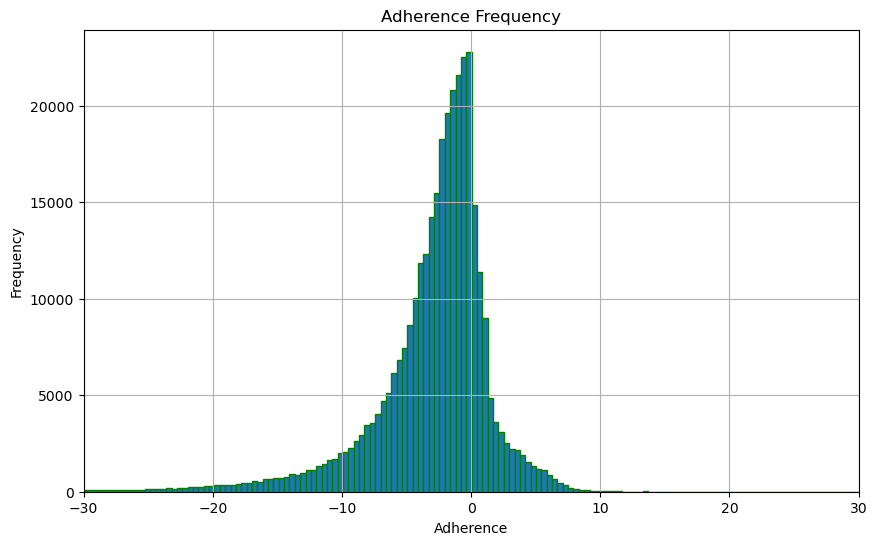

In [68]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(wego_adher_simp, bins=2500, edgecolor='green') # Create the histogram
plt.xlim(-30, 30)

plt.title('Adherence Frequency')  # Add a title
plt.xlabel('Adherence')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Add grid lines for better readability

plt.show()  # Display the plot

In [23]:
wego['ADHERENCE'].max()

88.383333

In [24]:
wego['ADHERENCE'].min()

-948.533333

In [25]:
wego['HDWY_DEV'].max()

565.433333

In [26]:
wego['HDWY_DEV'].min()

-64.0

sns.set_theme(style="ticks")

adherence = sns.load_dataset("wego_adher")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    adherence,
    x="adherence", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

what do the overall distributions of headway deviation look like?

Headway is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. Bunching occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. Gapping is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY.

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [27]:
wego[['HDWY_DEV', 'SCHEDULED_HDWY']]

,HDWY_DEV,SCHEDULED_HDWY
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
350324,5.266666,30.0
350325,NaN,NaN
350326,1.866666,30.0
350327,17.500000,30.0


In [28]:
wego_dev_perc = wego['HDWY_DEV'] / wego['SCHEDULED_HDWY']
wego_dev_perc

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
350324    0.175556
350325         NaN
350326    0.062222
350327    0.583333
350328         NaN
Length: 350329, dtype: float64

In [29]:
wego_dev = wego['HDWY_DEV'].dropna()
wego_dev

7          2.666666
8          1.966666
9         -0.483334
11        -2.166667
12        -3.883334
            ...    
350320     6.716666
350323     4.916666
350324     5.266666
350326     1.866666
350327    17.500000
Name: HDWY_DEV, Length: 265893, dtype: float64

In [30]:
wego_dev.shape

(265893,)

In [31]:
deviation = wego_dev.sort_values(ascending=False)
deviation

269843    565.433333
270201    543.833333
187826    529.550000
53214     508.700000
326698    505.233333
             ...    
227443    -49.666667
227442    -50.316667
108940    -53.166667
108941    -55.533334
30822     -64.000000
Name: HDWY_DEV, Length: 265893, dtype: float64

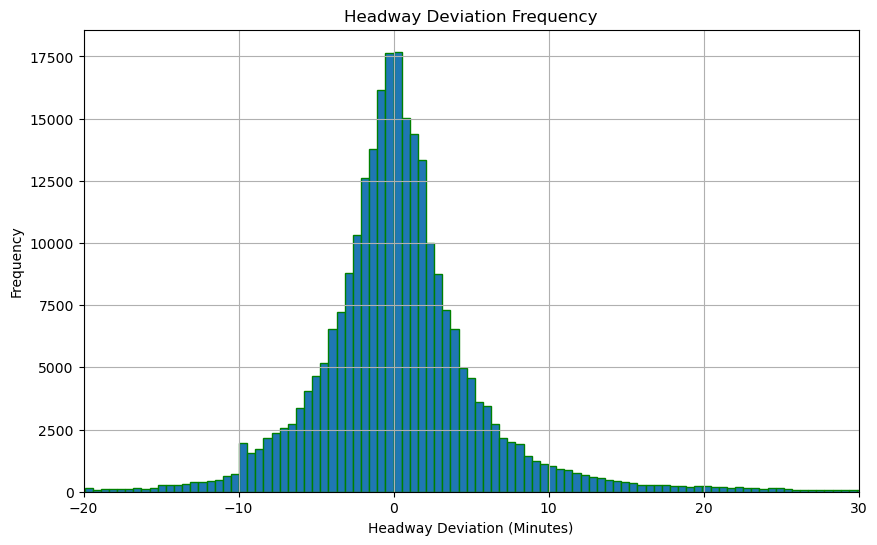

In [106]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(deviation, bins=1200, edgecolor='green') # Create the histogram
plt.xlim(-20, 30)

plt.title('Headway Deviation Frequency')  # Add a title
plt.xlabel('Headway Deviation (Minutes)')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.grid(True)  # Add grid lines for better readability

plt.show()  # Display the plot

In [33]:
# try a stacked histogram in seaborn where you can see HDWY_DEV and ADHERENCE against each other?

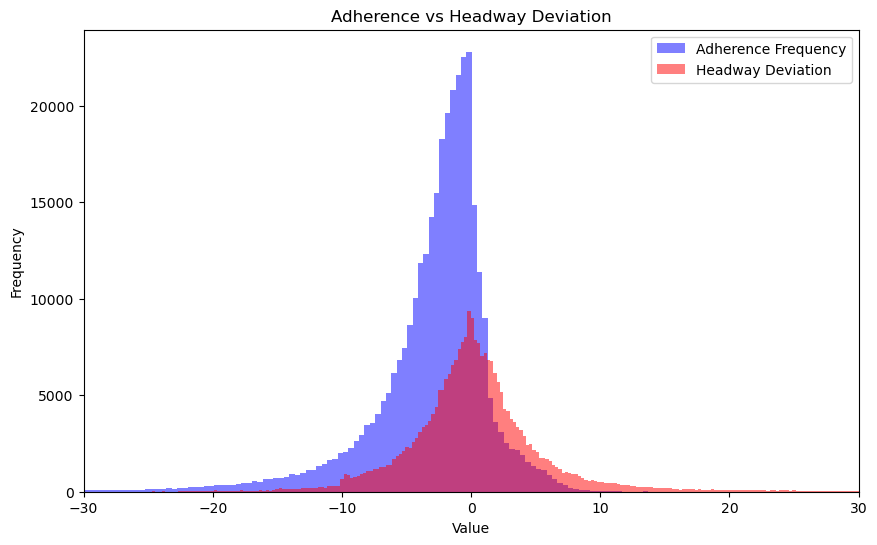

In [116]:
# Plotting overlapping histograms
plt.figure(figsize=(10, 6))  # Optional: Set figure size

# Plot the first histogram
plt.hist(wego_adher_simp, bins=2500, alpha=0.5, label='Adherence Frequency', color='blue')
plt.xlim(-30, 30)
# Plot the second histogram
plt.hist(deviation, bins=2500, alpha=0.5, label='Headway Deviation', color='red')
plt.xlim(-30, 30)
# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Adherence vs Headway Deviation')
plt.legend()  # Show legend

# Display the plot
plt.show()


In [34]:
# valid4 = number4[(number4['HDWY_DEV_PCT'] >= 0.5) & (number4['HDWY_DEV_PCT'] <= 1.5)]

In [35]:
wego['DATE'].min()

'2023-08-01'

In [36]:
wego['DATE'].max()

'2023-09-30'

In [37]:
wego['DATE'].sort_values

<bound method Series.sort_values of 0         2023-08-01
1         2023-08-01
2         2023-08-01
3         2023-08-01
4         2023-08-01
             ...    
350324    2023-09-30
350325    2023-09-30
350326    2023-09-30
350327    2023-09-30
350328    2023-09-30
Name: DATE, Length: 350329, dtype: object>

In [92]:
date = '2023-08-06'

filtered_df = wego[wego['DATE'] == date]

column_sum = filtered_df['ADHERENCE'].sum()
column_sum

-8053.882691

In [63]:
wego.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

worst offenders:
aug 4, 9, 18, 25
sep 2, 14, 15, 22, 29

least offenders:
aug 6, 13, 20, 27
sep 3, 4, 24

note: sep 4 == labor day

In [66]:
wego_dev

7          2.666666
8          1.966666
9         -0.483334
11        -2.166667
12        -3.883334
            ...    
350320     6.716666
350323     4.916666
350324     5.266666
350326     1.866666
350327    17.500000
Name: HDWY_DEV, Length: 265893, dtype: float64

In [87]:
# Example data
data = {
    'Early': early_perf,
    'Late': late_perf,
    'On Time': ontime_perf
}

# Convert data to a Pandas Series
data_series = pd.Series(data)


In [104]:
# # Plotting the pie chart
# plt.figure(figsize=(8, 8))  # Optional: Specify the size of the figure
# plt.pie(data_series, labels=data_series.index, autopct='%1.1f%%', startangle=140)

# # Add a title
# plt.title('WeGo Bus Efficiency')
# colors = ['yellowgreen', 'lightcoral', 'skyblue']
# plt.pie(data_series, labels=data_series.index, autopct='%1.1f%%', colors=colors, startangle=140)

# # Display the plot
# plt.show()

In [99]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [100]:
wego['ROUTE_DIRECTION_NAME'].head()

0      TO DOWNTOWN
1      TO DOWNTOWN
2      TO DOWNTOWN
3      TO DOWNTOWN
4    FROM DOWNTOWN
Name: ROUTE_DIRECTION_NAME, dtype: object

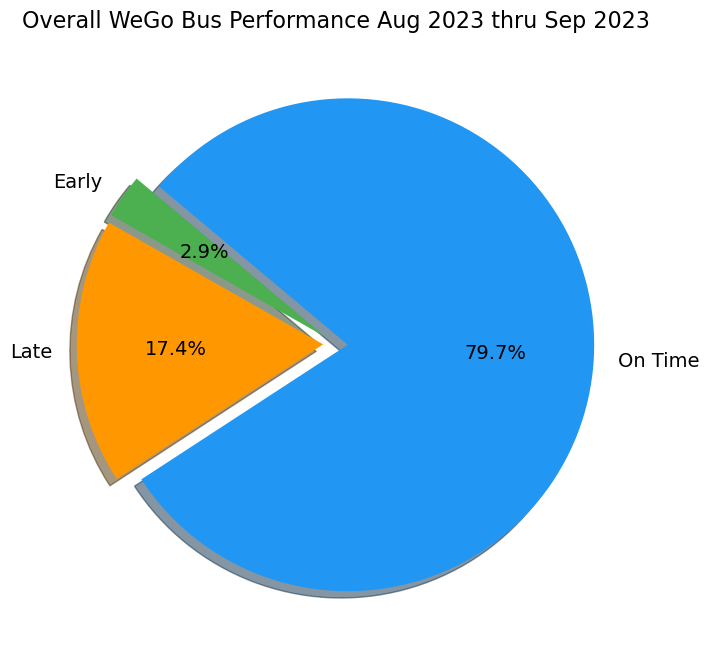

In [103]:
data = {
    'Early': early_perf,
    'Late': late_perf,
    'On Time': ontime_perf
}

# Convert data to a Pandas Series
data_series = pd.Series(data)

# Custom color palette for the pie chart
colors = ['#4CAF50', '#FF9800', '#2196F3']  

# Plotting the pie chart with enhanced visuals
plt.figure(figsize=(8, 8))  # Optional: Specify the size of the figure
plt.pie(data_series, 
        labels=data_series.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=colors,    # Apply custom colors
        shadow=True,      # Add a shadow for better depth perception
        explode=(0.05, 0.05, 0.05),  # Slightly separate the slices
        textprops={'fontsize': 14})  # Increase font size of labels

plt.title('Overall WeGo Bus Performance Aug 2023 thru Sep 2023', fontsize=16)

plt.show()

How does direction of travel, route, or location affect the headway and on-time performance?